## Analysis in social activism relating to misogyny on Twitter 

### For this cause we initially selected a few emblematic movements, that took place in twitter space spanning the years 2013 - Today:
* #EverydaySexism
* #WhyIStayed
* #YesAllWomen
* #NotOkay
* #MeToo
* #VOTEPROCHOICE
* #WHYWEMARCH

In [401]:
from Helpers import *
#Constants
class style:
   BOLD = '\033[1m'
   END = '\033[0m'
from IPython import get_ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## Data reading
All data was obtained using using *GetOldTweets-python* API, and is stored in the same database table. In order to be able to look at the individual movements and be able to compare their nature, we segregate the tweet list and we allocate a dataframe per movement

In [402]:
#Read the tweets
tweet_misog=read_database('misogyny')
tweet_misog['hashtags'] = [hash_list.lower() for hash_list in tweet_misog['hashtags']]
tweet_misog.head(5)

,date,hashtags,mentions,retweets,text,username
id,,,,,,
286259774121725953,2013-01-02 00:57:03.000000,#metoo,@KylieJenner,2,“ @KylieJenner : Gonna be 16 this year :) woohoo” oh shappp #metoo,annakinsey_
286258909767946240,2013-01-02 00:53:37.000000,#dirtypepper #metoo,@ZeFirePep,0,@ZeFirePep hahahaha #DirtyPepper lol #Metoo lol,Craighemmers
286258442535059456,2013-01-02 00:51:45.000000,#fatasses #metoo,,0,From the pics on Instagram I'm assuming most people don't have dieting as a New Years resolution #FatAsses #MeToo,TallBobby
286258181984894976,2013-01-02 00:50:43.000000,#metoo,,0,Remember when Luke came back in Season 9 and his hair was shoulder length and gross? #metoo,doowraey
286256763261579264,2013-01-02 00:45:05.000000,#metoo,@jj_onedirection,0,@jj_onedirection ya... Bueno si harry es feliz.. #MeToo,PalomaBootello


In [403]:
len(tweet_misog)

902573

Segregate the movements

In [404]:
me_too = tweet_misog[['#metoo' in tweet for tweet in tweet_misog['hashtags']] ]
why_march = tweet_misog[['#whywemarch' in tweet for tweet in tweet_misog['hashtags']] ]
yes_all_w = tweet_misog[['#yesallwomen' in tweet for tweet in tweet_misog['hashtags']] ]
everyday_sexism = tweet_misog[['#everydaysexism' in tweet for tweet in tweet_misog['hashtags']] ]
why_stayed= tweet_misog[['#whyistayed' in tweet for tweet in tweet_misog['hashtags']] ]
not_okay = tweet_misog[['#notokay' in tweet for tweet in tweet_misog['hashtags']] ]
vote_pro = tweet_misog[['#voteprochoice' in tweet for tweet in tweet_misog['hashtags']] ]

## Initial data exploration and selection
Scraping the data through the API is a not error-free process guarantee. Especially for hashtags that do not appear often, the script often crashes. As we see below, there are two clear outliers regarding the number of tweets over time, those are the movements #whywemarch and #voteprochoice, which have way too few tweets that would allow us to make some conclusive results. Therefore, these two hashtags will be excluded from further analysis. 

In [405]:
tweet_len = {
    '#metoo': len(me_too),
    '#whywemarch': len(why_march),
    '#yesallwomen': len(yes_all_w),
    '#everydaysexism': len(everyday_sexism),
    '#whyistayed':len(why_stayed),
    '#notokay': len(not_okay),
    '#voteprochoice': len(vote_pro)
}
tweet_len

{'#everydaysexism': 152214,
 '#metoo': 209089,
 '#notokay': 295405,
 '#voteprochoice': 213,
 '#whyistayed': 21052,
 '#whywemarch': 14,
 '#yesallwomen': 227728}

In [406]:
me_too.sort_values(by='date', inplace =True) 
not_okay.sort_values(by='date', inplace =True)

/Users/isabela/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/isabela/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



While most of the hashtags have titles that are very suggestive of the cause they represent, it is not the case for #metoo and #notokay. We look at a few tweets from the beginning (2013), and indeed most of them are miscellaneous and have no connection to the movement. (i.e. see examples below).

Therefore, we decide to take into account only the tweets that were tweeted starting with a key moment in the movement, which popularised the movement and assigned the hashtag to the cause. 
In case of #metoo, this is the day of __2017/10/16__, when Actress Alyssa Milano sparks the #metoo campaign, which encourages women and men to share their stories of harassment in hopes of shedding light on the magnitude of the problem.
For #notokay, this is __2016/10/07__, when Kelly Oxford tweets first time with #notOkay, in response to a tape emerged that showed Donald Trump bragging about his ability to get away with groping and kissing women at his leisure.

In [407]:
pd.options.display.max_colwidth= 200
me_too.iloc[0:10][['date', 'text']]

,date,text
id,,
285899046919479296,2013-01-01 01:03:39.000000,@Arya_No1 #MeToo #sorryDad @A_Man_Is
285900393895055360,2013-01-01 01:09:00.000000,@SketchySydney your not alone #metoo
285900504867942400,2013-01-01 01:09:26.000000,@bergin92 your goina bursht #metoo pic.twitter.com/X3Szghw
285900671109173248,2013-01-01 01:10:06.000000,@bazooka77 didn't you tell me a couple weeks ago you were being good??? Haha!!!!! #pizzaobsessed #metoo #Ilovepizza
285900739585400832,2013-01-01 01:10:22.000000,@meghanwall19 i know!!! #metoo :( i wish you guys woulda came down er something #wearedoingnothing
285901477925486592,2013-01-01 01:13:18.000000,"""@mariahw323: I'm bored. #NeedALife "" #MeToo lol"
285901503464615936,2013-01-01 01:13:24.000000,@WishHopeDream13 @sappstick @Georgiapirate27 #absotively #metoo
285905185904144384,2013-01-01 01:28:02.000000,@noorz7x Hahah! How suspicious... #MeToo #especially #swag #and #yolo
285906120596406272,2013-01-01 01:31:45.000000,@cbev31 #metoo #lovefromcalgary


In [408]:
not_okay.iloc[0:10][['date', 'text']]

,date,text
id,,
285949304982605824,2013-01-01 04:23:21.000000,#NotOkay
285949378303258625,2013-01-01 04:23:39.000000,I'm sober right now #wtf #notokay
285949427523411968,2013-01-01 04:23:50.000000,Happy New Year's Eve! I HAVE THE FLU!!! #notokay
285949824782700544,2013-01-01 04:25:25.000000,10 guys and I'm the only girl... #notokay
285949973999267840,2013-01-01 04:26:01.000000,Of course I would get my period on New years eve #notOkay
285950057864368129,2013-01-01 04:26:21.000000,im the ONLY single one here.. #notokay
285950465609461761,2013-01-01 04:27:58.000000,@alexkitz73 I refuse to co-date if he's in the picture. #notokay #nobiebs
285950811605958656,2013-01-01 04:29:20.000000,Being stuck at home on New Years <<< #notokay
285951040380096512,2013-01-01 04:30:15.000000,Ew.. Why is there a One Direction song paying in the background of the Honey Boo Boo commercial. #notokay


In [409]:
me_too_filtered= me_too[me_too['date'] > '2017-10-15']
me_too_filtered.iloc[0:10][['date', 'text']]

,date,text
id,,
919325640293314560,2017-10-15 00:14:47.000000,#metoo
919330925388890112,2017-10-15 00:35:47.000000,Chansung's cameo #MidnightRunners They are so dumb lmao #Metoo #reuped pic.twitter.com/FYV0tOSD7D
919337503080902656,2017-10-15 01:01:55.000000,"If women who have been sexually harassed/assaulted wrote #metoo as a status, we might give people a sense of the magnitude of the problem"
919345421327020032,2017-10-15 01:33:23.000000,"@EFolan_ABC7 ""I know where I'm going after work"" #MeToo"
919351358477750273,2017-10-15 01:56:59.000000,#MeToo #SaturdayNightLive #livemusic #musician #dance #sing #love #giglife #seeyousoon Next week… https://www. instagram.com/p/BaP2c8IjKKV/
919510645007110144,2017-10-15 12:29:56.000000,"find a SINGLE me too post on Facebook today that is not FILLED with additional #MeToo s in the comments. No, #notallmen but #yesallwomen"
919607884006264838,2017-10-15 18:56:19.000000,#MeToo #YesAllWomen #survivedandthriving pic.twitter.com/En6pZd3WVS
919609359029669894,2017-10-15 19:02:11.000000,#MeToo We are not alone. #YesAllWomen
919619653336416256,2017-10-15 19:43:05.000000,#metoo #YesAllWomen


In [410]:
not_okay_filtered = not_okay[not_okay['date']> '2016-10-07-22-00-00']
not_okay_filtered.iloc[0:10][['date', 'text']]

,date,text
id,,
784516905369567233,2016-10-08 00:13:00.000000,I just want to be happy about the Tangled trailer... but why am I watching an outlast let's play with my brother instead #notokay
784537509565005826,2016-10-08 01:34:52.000000,Scary part of election: no one is denying the deplorable behavior of the candidates. They've just come to accept it as being okay. #notokay
784543052987830275,2016-10-08 01:56:54.000000,"Women: keep tweeting me assaults with #notokay Here was my second assault: Boy in drama class grabbed my ""pussy"" during class, I was 13"
784543485479313408,2016-10-08 01:58:37.000000,#notokay Man grabbing my ass at a bus stop when I was 18. Hard.
784543684285108226,2016-10-08 01:59:25.000000,I was getting into my car at night when a kid walked around it and flashed his dick at me #notokay https:// twitter.com/kellyoxford/st atus/784543052987830275 …
784543694770806785,2016-10-08 01:59:27.000000,"I am currently receiving 2 sex assault stories per second. Anyone denying rape culture, please look at my timeline now. #notokay"
784543726035202049,2016-10-08 01:59:35.000000,"#notokay man in a bar bought me a beer, then had a friend physically restrain me, pulled out his penis & made me touch it."
784543818439921664,2016-10-08 01:59:57.000000,1st I can recall: 14 & man at the pub library tried to look up my uniform skirt from the bottom bookshelf w/a mirror. #notokay
784556506645692416,2016-10-08 02:50:22.000000,Same. I was 8 years old at a county fair. #NotOkay Never told anyone about this until now.... https:// twitter.com/kellyoxford/st atus/784541062119456769 …


## Integrating all in a single dataframe, misoginy 

With the present data, we are now ready to store it into the format if choice and integrate it afterwards in a single dataframe, mysogyny. Since there are tweets which contain more than one hashtag of interest, we will use hierarchical indexing based on leading hashtag and id. That allows us to make further analysis and comparison between the different movements. 

In [411]:
conform_dataframes(me_too_filtered, '#metoo')
conform_dataframes(yes_all_w, '#yesallwomen')
conform_dataframes(everyday_sexism, '#everydaysexism')
conform_dataframes(why_stayed, '#whyistayed')
conform_dataframes(not_okay_filtered, '#notokay')

/Users/isabela/Documents/Master/Sem1/ADA/project/Milestone3/Helpers.py:318: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/isabela/Documents/Master/Sem1/ADA/project/Milestone3/Helpers.py:319: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/isabela/anaconda/envs/ada/lib/python3.5/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [412]:
yes_all_w.head()

,date,hashes_inside,to,retweets,text,user,hashtag,epoch
id,,,,,,,,
470676548769439744,2014-05-25 23:23:28.000000,#yesallwomen #metoo,@cmeak,5,"Walking While Fat and Female - Or, Why I Don't Care Not All Men are Like That http:// wp.me/p1JBwZ-kR via @cmeak #YesAllWomen #meToo",peacebang,#yesallwomen,1.401053e+09
470424064914239488,2014-05-25 06:40:11.000000,#yesallwomen #metoo,,0,"Thankful for #YesAllWomen . Grateful to my sisters for sharing, when I'm feeling too triggered & angry right now to write anything. #MeToo",mamabythebay,#yesallwomen,1.400993e+09
470799876046213120,2014-05-26 07:33:32.000000,#yesallwomen #metoo,,0,"I wish I had the courage of all of these #YesAllWomen posters. Can I just say, #MeToo ?",BehindTheBook08,#yesallwomen,1.401082e+09
471343441855922177,2014-05-27 19:33:28.000000,#metoo #yesallwomen,,1,"It seems like a whole lot of people are ready to stop coping, and start *handling* violence, discrimination and sexism. #metoo #YesAllWomen",SuzyHobbsBaker,#yesallwomen,1.401212e+09
471996090800410624,2014-05-29 14:46:51.000000,#yesallwomen #metoo,,0,#YesAllWomen #metoo,AWickedOldLady,#yesallwomen,1.401368e+09


In [413]:
temp = pd.DataFrame()
temp = pd.concat([ everyday_sexism, why_stayed, yes_all_w, not_okay_filtered, me_too_filtered], axis = 0)
misogyny = temp.reset_index()
misogyny.set_index(['hashtag', 'id'], inplace=True)
temp.index.is_unique, misogyny.index.is_unique

(False, True)

In [414]:
misogyny.head()

date  \
hashtag         id                                               
#everydaysexism 285909294740828160  2013-01-01 01:44:22.000000   
                285912742005702656  2013-01-01 01:58:04.000000   
                286018168596623361  2013-01-01 08:57:00.000000   
                286025688232914944  2013-01-01 09:26:52.000000   
                286072893794836483  2013-01-01 12:34:27.000000   

                                                      hashes_inside to  \
hashtag         id                                                       
#everydaysexism 285909294740828160                  #everydaysexism      
                285912742005702656    #c4houseparty #everydaysexism      
                286018168596623361                  #everydaysexism      
                286025688232914944  #everydaysexism #endrapeculture      
                286072893794836483      #summadayze #everydaysexism  @   

                                   retweets  \
hashtag         id                            
#everydaysexism 285909294740828160        0   
                285912742005702656        0   
                286018168596623361        0   
                286025688232914944        0   
                286072893794836483        0   

                                                                                                                                                                           text  \
hashtag         id                                                                                                                                                                
#everydaysexism 285909294740828160  Adam Ant has two drummers, One in loose tshirt and jeans other in tight top and hotpants. Can you guess which one's female? #everydaysexism   
                285912742005702656                                                                 #c4houseparty hey! what's with the girl dancers? Boy oh boy. #everydaysexism   
                286018168596623361                                      Apart from, y'know, being drunkenly hit on and repeatedly touched without my permission #everydaysexism   
                286025688232914944                                            Things I don't like: men who don't want to hear "no" as an answer #EverydaySexism #Endrapeculture   
                286072893794836483  77 men & 7 women arrested @#summadayze & yet the image presented to the public via mainstream media is a woman. smells like #everydaysexism   

                                              user         epoch  
hashtag         id                                                
#everydaysexism 285909294740828160       PBHibbert  1.357001e+09  
                285912742005702656     kirstygogan  1.357002e+09  
                286018168596623361  therealkaterin  1.357027e+09  
                286025688232914944      LizPrisley  1.357029e+09  
                286072893794836483     KL_allemand  1.357040e+09

In [415]:
len(misogyny)

489970

In [416]:
misogyny['date']=pd.to_datetime(misogyny.date)
misogyny['date'] = [d.date() for d in misogyny['date']]

In [417]:
misogyny.head()

date  \
hashtag         id                               
#everydaysexism 285909294740828160  2013-01-01   
                285912742005702656  2013-01-01   
                286018168596623361  2013-01-01   
                286025688232914944  2013-01-01   
                286072893794836483  2013-01-01   

                                                      hashes_inside to  \
hashtag         id                                                       
#everydaysexism 285909294740828160                  #everydaysexism      
                285912742005702656    #c4houseparty #everydaysexism      
                286018168596623361                  #everydaysexism      
                286025688232914944  #everydaysexism #endrapeculture      
                286072893794836483      #summadayze #everydaysexism  @   

                                   retweets  \
hashtag         id                            
#everydaysexism 285909294740828160        0   
                285912742005702656        0   
                286018168596623361        0   
                286025688232914944        0   
                286072893794836483        0   

                                                                                                                                                                           text  \
hashtag         id                                                                                                                                                                
#everydaysexism 285909294740828160  Adam Ant has two drummers, One in loose tshirt and jeans other in tight top and hotpants. Can you guess which one's female? #everydaysexism   
                285912742005702656                                                                 #c4houseparty hey! what's with the girl dancers? Boy oh boy. #everydaysexism   
                286018168596623361                                      Apart from, y'know, being drunkenly hit on and repeatedly touched without my permission #everydaysexism   
                286025688232914944                                            Things I don't like: men who don't want to hear "no" as an answer #EverydaySexism #Endrapeculture   
                286072893794836483  77 men & 7 women arrested @#summadayze & yet the image presented to the public via mainstream media is a woman. smells like #everydaysexism   

                                              user         epoch  
hashtag         id                                                
#everydaysexism 285909294740828160       PBHibbert  1.357001e+09  
                285912742005702656     kirstygogan  1.357002e+09  
                286018168596623361  therealkaterin  1.357027e+09  
                286025688232914944      LizPrisley  1.357029e+09  
                286072893794836483     KL_allemand  1.357040e+09

## Impact of each movement

In [418]:
#Small analysis of data
def small_analysis(tweet_data, hashtag_str):
    print(style.BOLD+hashtag_str+style.END)
    n=len(tweet_data)
    print('Number of ' + hashtag_str + ' tweets:'+ str(n))
    print('Tweets from {} to {}'.format(tweet_data['date'].iloc[0], tweet_data['date'].iloc[-1]))
    ratio = len(tweet_data['user'].unique())/n
    n_users = len(tweet_data['user'].unique())
    print('Number of different users tweeting: {},  {} of the total'.format(len(tweet_data['user'].unique()), 
                                                                             len(tweet_data['user'].unique())/n))
    return [ratio, (1-ratio)]


In [419]:
list_r = []
list_r.append(small_analysis(misogyny.loc['#everydaysexism'], '#EverydaySexism'))
list_r.append(small_analysis(misogyny.loc['#whyistayed'], '#WhyIStayed'))
list_r.append(small_analysis(misogyny.loc['#yesallwomen'], '#YesAllWomen'))
list_r.append(small_analysis(misogyny.loc['#notokay'], '#NotOkay'))
list_r.append(small_analysis(misogyny.loc['#metoo'], '#MeToo'))

#EverydaySexism
Number of #EverydaySexism tweets:152214
Tweets from 2013-01-01 to 2017-12-09
Number of different users tweeting: 65229,  0.42853482596870196 of the total
#WhyIStayed
Number of #WhyIStayed tweets:21052
Tweets from 2013-03-07 to 2015-01-09
Number of different users tweeting: 11553,  0.5487839635189056 of the total
#YesAllWomen
Number of #YesAllWomen tweets:227728
Tweets from 2014-05-25 to 2017-12-09
Number of different users tweeting: 77763,  0.341473160963957 of the total
#NotOkay
Number of #NotOkay tweets:31912
Tweets from 2016-10-08 to 2017-12-08
Number of different users tweeting: 19458,  0.6097392830283279 of the total
#MeToo
Number of #MeToo tweets:57064
Tweets from 2017-10-15 to 2017-12-10
Number of different users tweeting: 40242,  0.7052081872984719 of the total


In [420]:
list_r

[[0.42853482596870196, 0.571465174031298],
 [0.5487839635189056, 0.45121603648109443],
 [0.341473160963957, 0.658526839036043],
 [0.6097392830283279, 0.3902607169716721],
 [0.7052081872984719, 0.2947918127015281]]

** Personal character of each movement**
From the information above, it is interesting to compare the percentage of tweets that were generated by unique users versus non-unique users. That can tell if the movement is mostly supported by a few active people tweeting about the cause, or if the involvement is more general and spread. 
From the plot below, we can see that '#metoo' has the highest percentage of the unique tweets, which suggests that there a lot of different people sharing their own stories, while '#yesallwomen' seems to have lowest percentage on unique users, which indicates there are a few key people tweeting about this.

This seems to be in lign with how personal each movement targets to be, '#metoo' encourages personal stories and targets the individual, while 'yesallwomen' targets the population. 

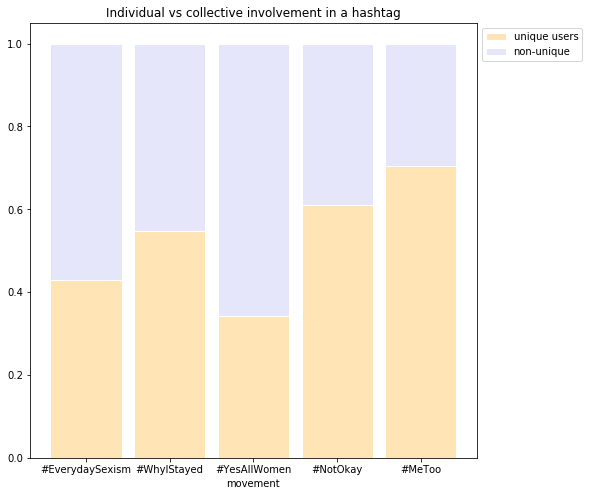

In [323]:
r = [0,1,2,3,4]
# plot
barWidth = 0.85
names = ('#EverydaySexism', '#WhyIStayed', '#YesAllWomen', '#NotOkay', '#MeToo' )
unique = [t[0] for t in list_r]
non_unique = [t[1] for t in list_r] 
# Create green Bars
fig = plt.figure()
fig1 = plt.bar(r, unique, color='#FFE4B5', edgecolor='white', width=barWidth, label = 'unique users')
fig1 = plt.bar(r, non_unique, bottom=unique, color='#E6E6FA', edgecolor='white', width=barWidth, label = 'non-unique')
# Custom x axis
fig1.figsize=100
plt.xticks(r, names)
plt.xlabel("movement")
plt.rcParams['figure.figsize'] = (8,8)
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Individual vs collective involvement in a hashtag')
# Show graphic
plt.show()
fig.savefig('involvement.png', bbox_inches = 'tight', dpi = 300)

**Distribution of the number of tweets over time**
We begin by looking at each movement independently to observe the particular trend of the movement. 
Afterwards we plot them interactively and together to analyse if the peaks in popularity corelate and to relate the events to specific dates. 

Laura Bates is the woman behind the '#EverydaySexism' project, a movement which includes both a website and a Twitter account. The movement started in 2012 but gained popularity one year later and we can see the hashtag has been going strong, with a few peaks spread (to be analysed later).

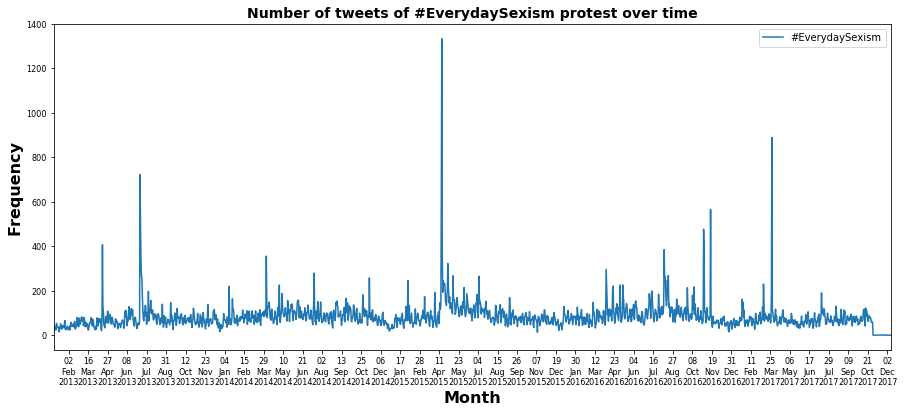

In [421]:
#Static plot
plot_num_tweets2(misogyny.loc['#everydaysexism'], '#EverydaySexism', weekday = 5, interval =6)

On 8th of September 2014, footage of NFL player Ray Rice punching his wife Janay Palmer in a casino elevator is released publicly (the scene took place in February). 
That triggered the first apparition of #WhyIStayed, when Beverly Golden tells her story and encourages women to share their stories related to why they chose to stay in an abusive relationship. 

We can see the hashtag went strong for a few weeks, but later faded away.

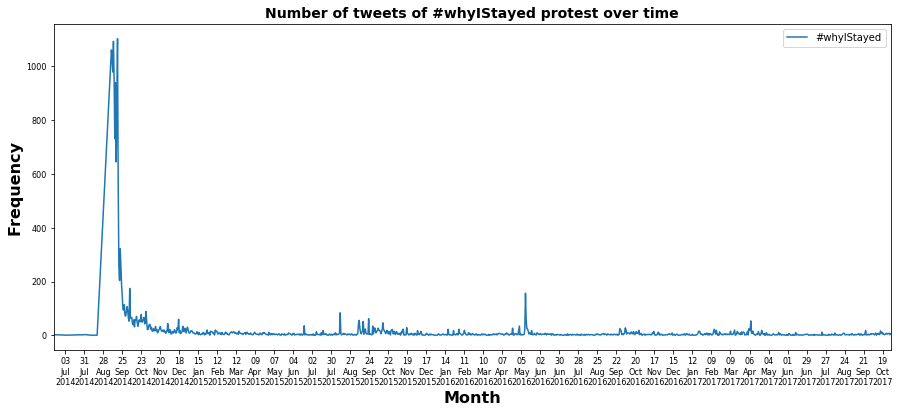

In [136]:
plot_num_tweets2(misogyny.loc['#whyistayed'], label1='#whyIStayed',  date_to=datetime.strptime('2014-06-14', '%Y-%m-%d').date(), 
                weekday = 3, interval =4)

On 23rd of May, Elliot Rodger kills 6 people in Isla Vista, California and publishes a mysogynistic video on his Youtube account. On the day after the event, the hashtag #YesAllWomen was born and became the label under which women shared their experiences with male entitlement.

We can notice a steady decrease from its peak in the beginning, but unlike the '#whyIStayed', there are a few clear peaks later, which suggests the movement still resonates in the Twitter space nowadays. 

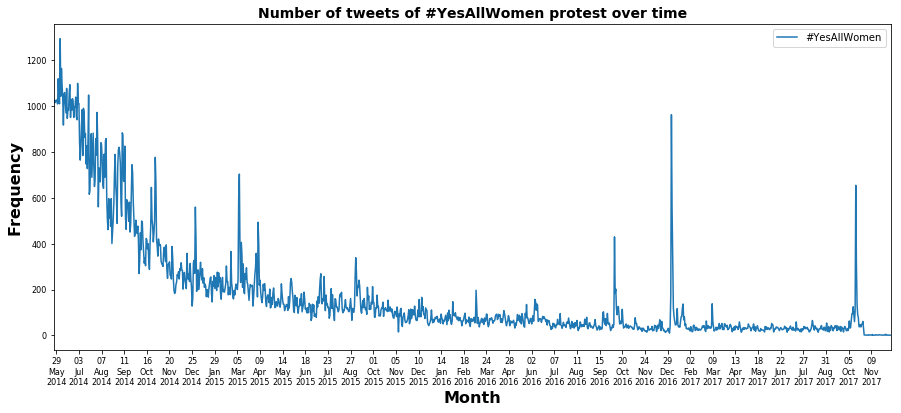

In [129]:
plot_num_tweets2(misogyny.loc['#yesallwomen'], '#YesAllWomen', weekday=3, interval=5)

The movement '#notOkay' emerged as a response to a tape that showed Donald Trump bragging about his ability to get away with groping and kissing women at his leisure.
After actress Kelly Oxford tweets first time with #notOkay, she encourages women to share their stories when they were assaulted, in order to avoid normalization of such mysoginistic behaviour. 

We can notice that the movement steadily decreased in the first few weeks after its appeareance, barely making any impact nowadays.


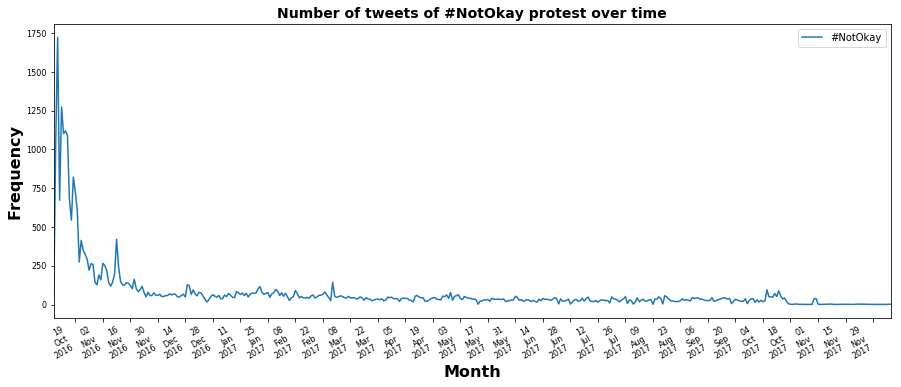

In [337]:
plot_num_tweets2(misogyny.loc['#notokay'], '#NotOkay', weekday=2, interval=2)

A very recent movement was sparked on 2017/10/16, when actress Alyssa Milano started the #metoo campaign which encourages women and men to share their stories of harassment in hopes of shedding light on the magnitude of the problem. 
We can see that the the hashtag was very popular over the last two months , with no clear signs of fading away yet. 

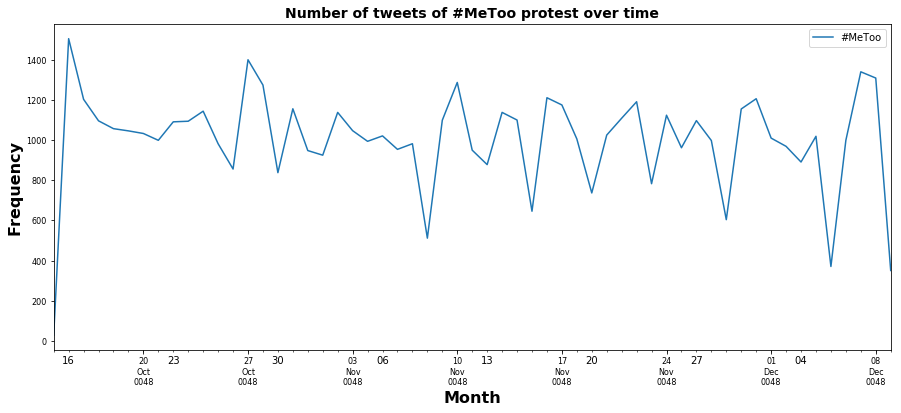

In [334]:
plot_num_tweets2(misogyny.loc['#metoo'], '#MeToo')

**Interactive plots **

In [245]:
event=['#YesAllWomen is created as a reaction to shootigs by Elliot Rodger',
    'First apparition of #WhyIStayed, when Beverly Golden tells her story',
        'Beverly Gooden writes a blogpost on NYT ',
       '3-year annyversary of Everyday Sexism Project by Laura Bates',
       'tape with Donald Trump ''locker talk'' emerged. #NotOkay is created',
       'Women’s March on Washington, conceived in the aftermath of the presidential election',
       'Hillary Clintonstates: misogyny certainly played a role in 2016 election loss',
       'Actress Alyssa Milano sparks the #meToo movement ',
       'Anthony Rapp accuses Kevin Spacey of sexual harassment',
       'LA march protest'
]

date=['2014/05/24',
    '2014/09/08',
      '2014/10/13',
      '2015/04/16',
      '2016/10/07',
      '2017/01/20',
      '2017/04/07',
      '2017/10/16',
      '2017/10/30',
      '2017/11/12'
     ]


#Create dataframe
events=pd.DataFrame()
#Add data
events['event']=event
events['date']=pd.to_datetime(date, format='%Y/%m/%d')
events.sort_values(by='date', inplace=True) #Sort by date
events.head()

,event,date
0,#YesAllWomen is created as a reaction to shootigs by Elliot Rodger,2014-05-24
1,"First apparition of #WhyIStayed, when Beverly Golden tells her story",2014-09-08
2,Beverly Gooden writes a blogpost on NYT,2014-10-13
3,3-year annyversary of Everyday Sexism Project by Laura Bates,2015-04-16
4,tape with Donald Trump locker talk emerged. #NotOkay is created,2016-10-07


In [231]:
pd.options.display.max_colwidth= 240
# example of tracking down the tweets that come from days with a peak 
misogyny.loc['#everydaysexism'][misogyny.loc['#everydaysexism']['date'] == '2015-04-22' ][10:15]

,date,hashes_inside,to,retweets,text,user,epoch
id,,,,,,,
590652468737998848,2015-04-22,#taxday #everydaysexism,,0,Do you have any tape? Because I'm totally ripped. read more at http:// dld.bz/d9Y4a #TaxDay #everydaysexism,GurmitSingh11,1.429657e+09
590653237822361602,2015-04-22,#everydaysexism,@NZInlandRevenue,2,More in #everydaysexism “ @NZInlandRevenue : http:// bit.ly/1FhgFjY https:// amp.twimg.com/v/f447a797-4fb b-4e20-90dc-f9858e86982a … ” What does she have to do with my tax return?,HoneyBeeGeek,1.429658e+09
590654123206430720,2015-04-22,#everydaysexism,@MarkDiStef @hcjewell,0,@MarkDiStef @hcjewell That is exactly how many female politicians are treated! #everydaysexism,ivorytowerjourn,1.429658e+09
590654143355826177,2015-04-22,#everydaysexism,@ArlanMeekhof @rebekahwarren,1,"@ArlanMeekhof a little reminder: it was Senator @rebekahwarren and Senator Tonya Schuitmaker and not ""the two blonde ones"" #EverydaySexism",Andi_Moelli,1.429658e+09
590656111944069120,2015-04-22,#everydaysexism,,1,"Turn up at a hotel lounge to chair a meeting- get ignored while all men around me are seated- assume I want ""afternoon tea"" #EveryDaySexism",amcl1,1.429658e+09


In [422]:
# plot the number of tweets with light smoothening to more easily distinguish the trends
plot_num_tweets_interactive2(misogyny.loc['#everydaysexism'], '#EverydaySexism', misogyny.loc['#whyistayed'], '#WhyIStayed',
                            misogyny.loc['#yesallwomen'], '#YesAllWomen',
                             misogyny.loc['#notokay'], '#NotOkay',
                             misogyny.loc['#metoo'], '#MeToo',
                             events = events, smooth_perform=True
                            )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~isabelaBel/0 or inside your plot.ly account where it is named 'simple-annotation'


## How closely related the movements are 
We plot the co-coccurence of tags with each other to see to waht degree supporters of one movement tweet with the other similar movements. We notice that a **distinct pattern**:
Very few of the '#metoo' tweets co-appear with other movements, while all #NotOkay, #YesAllWomen and #EverydaySexism appear in almost 100% of the tweets with #metoo. That could be explained if for example supporters of the older movement wanted to spark again the hashtag by using it in correlation with a very trending hashtag.

In [423]:
misogyny['date']=pd.to_datetime(misogyny.date)

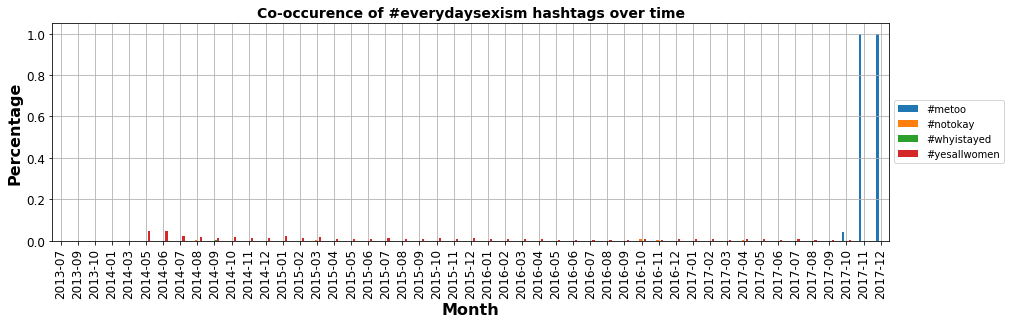

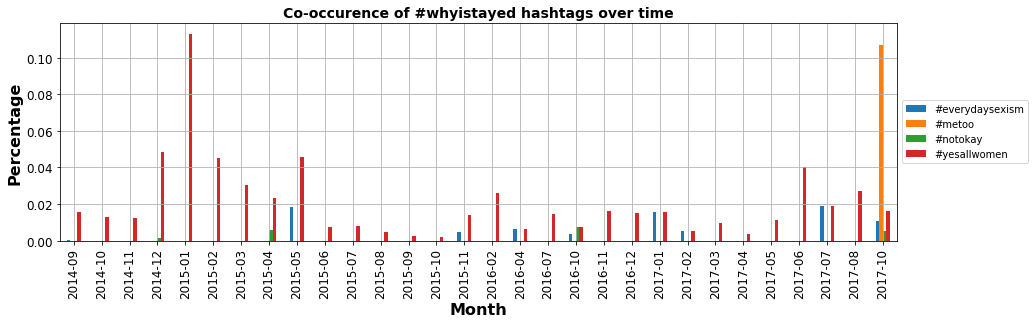

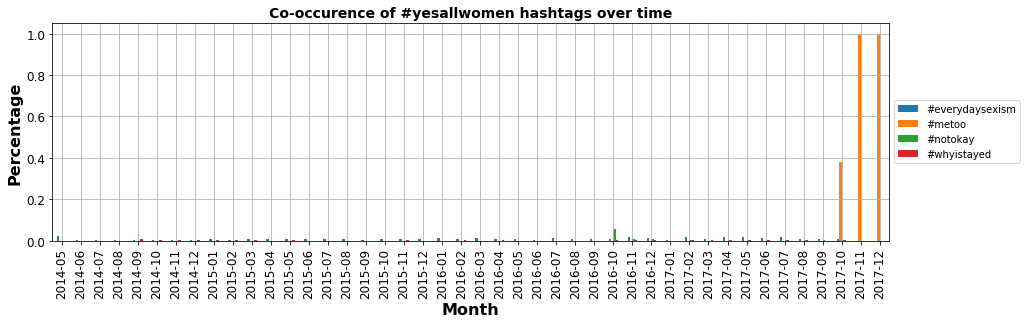

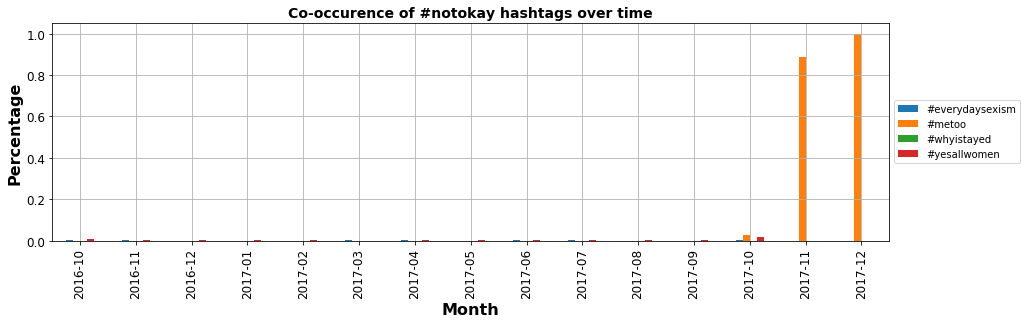

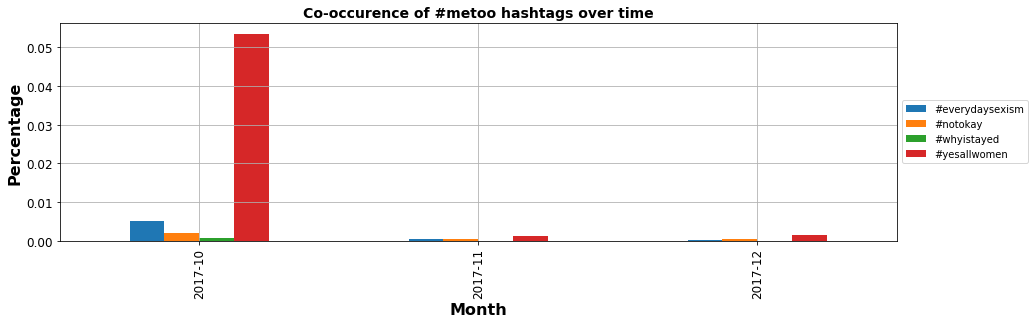

In [344]:
## Polarization of the hashtags
all_tags=['#everydaysexism', '#whyistayed', '#yesallwomen', '#notokay', '#metoo']
rest_tags = ['#everydaysexism', '#whyistayed', '#yesallwomen', '#notokay', '#metoo']
for tag in all_tags:
    rest_tags.remove(tag)
    _=cooccurence_hashtag(misogyny.loc[tag], rest_tags, tag)
    #Interactive version
    _=cooccurence_hashtag_interactive(misogyny.loc[tag], rest_tags, tag, '')
    rest_tags.append(tag)

# Holistic approach over the mysoginy related movements

## Topics modelling

Select data from each movements to get an evenly distributed sample of tweets over which to do the LDA 
#everydaysexism', '#whyistayed', '#yesallwomen', '#notokay', '#metoo'

In [285]:
everyday= misogyny.loc['#everydaysexism']
whystay = misogyny.loc['#whyistayed']
yes = misogyny.loc['#yesallwomen']
notok= misogyny.loc['#notokay']
metoo= misogyny.loc['#metoo']

In [424]:
# make sure we only select the english tweets. 
def get_lang(df_m, init=True):
    if not init:
        df_m['lang'] = 'null'
    count = 0
    for i,tweet in df_m.iterrows():
        count = count+1
        if (count % 1000 == 0):
            print(count)
        if (tweet['lang']=='null'):
            try:
                df_m.loc[i,'lang']=detect_language(tweet['text'])
            except json.JSONDecodeError:
                print('err_json')
                pass
    return df_m

In [367]:
# obtain a randomly sampled batch of tweets from each movement to do LDA on (otherwise it would take too long)
s_size = 3000
sample_everyday= everyday.sample(s_size)
get_lang(sample_everyday, init=False)
sample_whystay = whystay.sample(s_size)
get_lang(sample_whystay, init=False)
sample_yes = yes.sample(s_size)
get_lang(sample_yes, init=False)
sample_notok= notok.sample(s_size)
get_lang(sample_notok, init=False)
sample_metoo= metoo.sample(s_size)
get_lang(sample_metoo, init=False)

In [393]:
# get only the english tweets
len(sample_everyday[sample_everyday['lang'] == 'en']), len(sample_whystay[sample_whystay['lang'] == 'en']), \
len(sample_notok[sample_notok['lang'] == 'en']), len(sample_yes[sample_yes['lang'] == 'en']), \
len(sample_metoo[sample_metoo['lang'] == 'en'])

(2944, 2939, 2522, 2942, 2241)

In [394]:
size_min = 2241
sample_everyday_f = (sample_everyday[sample_everyday['lang'] == 'en']).sample(size_min)
sample_whystay_f = (sample_whystay[sample_whystay['lang'] == 'en']).sample(size_min)
sample_yes_f = (sample_yes[sample_yes['lang'] == 'en']).sample(size_min)
sample_notok_f = (sample_notok[sample_notok['lang'] == 'en']).sample(size_min)
sample_metoo_f = (sample_metoo[sample_metoo['lang'] == 'en']).sample(size_min)

In [397]:
misog_sample = pd.concat([sample_everyday_f,sample_whystay_f, sample_yes_f, sample_notok_f, sample_metoo_f])
# ensure they are unique 
misog_sample_unique = misog_sample.reset_index().drop_duplicates(subset='id', keep='first').set_index('id')
misog_sample_unique.head()

,date,hashes_inside,to,retweets,text,user,epoch,polarity,subj,lang
id,,,,,,,,,,
884468463993057280,2017-07-10,#everydaysexism #shitjournalism,,0,This makes me furiously mad. #everydaysexism #shitjournalism https:// twitter.com/libbydawes89/s tatus/883933287407812608 …,rach_waters,1.499709e+09,-0.437500,1.000000,en
582464613620547584,2015-03-30,#everydaysexism,,0,Disgraced former Lib Dem MP Mike Hancock vows to run again < sleazy disgusting pig #EverydaySexism http:// gu.com/p/4746m,silly_snowflake,1.427705e+09,-0.416667,0.666667,en
597268367645417472,2015-05-10,#everydaysexism #howtospotafeminist #whyistayed #thisiswhatafeministlookslike #addwomen,,1,#everydaysexism #HowToSpotAFeminist #WhyIStayed #thisiswhatafeministlookslike #addwomen https:// twitter.com/Kohd101/status /597240276235628544 …,Dikaiomata,1.431235e+09,-0.250000,1.000000,en
868011698762002432,2017-05-26,#feminism #feminismiscancer #womenagainstfeminism #feminist #feminists #sjw #antifeminst #everydaysexism #womenfightingfeminism,,1,#feminism TRUTH #FeminismIsCancer #WomenAgainstFeminism #feminist #feminists #SJW #antifeminst #everydaysexism #WomenFightingFeminism https:// twitter.com/womenagainstfe m/status/495088038318333952 …,BillColeman106,1.495785e+09,-0.250000,1.000000,en
401123516025942016,2013-11-15,#everydaysexism #bbcqt,,0,STAFF the ships not MAN the ships #everydaysexism #bbcqt,adodridge,1.384470e+09,0.000000,0.000000,en


In [399]:
len(misog_sample), len(misog_sample_unique)

(11205, 11204)

In [400]:
with open('LDA_sample_filtered_english.pkl', 'wb') as f:
        pickle.dump(misog_sample_unique, f, pickle.HIGHEST_PROTOCOL)

It takes a realtively long time, we only do it once and pickle the result. 

In [ ]:
preprocessing_options={'handles':False, 'urls':False}
seed = 42 # reproducibility!
random.seed(seed)
ldamodel, dictionary, doc_term_matrix =get_topics_list2(misogyny.loc['#everydaysexism'], **preprocessing_options)

data =  pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
with open('./Data/mysogny_topic.pkl', 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [425]:
#Load data and show topics
# Interpretation of results can be found on the blog
lda=pickle.load(open('./Data/lda_docs_data_miso.pkl','rb'))
pyLDAvis.save_html(lda.get('data'), 'topics_misogyny.html')
pyLDAvis.display(lda.get('data'))

## Sentiment analysis for the aggregated data 

In [307]:
whole_data = [everyday, whystay, yes, notok, metoo]
misoginy_all = pd.concat(whole_data)
# ensure they are unique 
misoginy_all = misoginy_all.reset_index().drop_duplicates(subset='id', keep='first').set_index('id')


In [308]:
len(misogyny), len(misoginy_all)

(489970, 486894)

In [ ]:
#Get setiments and subjectivity
polarity_mis, subj_mis=zip(*map(lambda tweet: get_tweet_sentiment(tweet), misoginy_all.text.values))
misoginy_all['polarity'] = polarity_mis
misoginy_all['subj'] = subj_mis

## takes time so we pickle the result for later retrieval. 
with open('misogyny_aggreagated.pkl', 'wb') as f:
        pickle.dump(misoginy_all, f, pickle.HIGHEST_PROTOCOL)

### Plots

Regarding polarity, we can notice that at the beginning, the tweets seem to be equally distributed among positive, negative and neutral. However, around July 2015, the positive tweets start to increase in percentage, which is to be slightly unexpected. (detailed analysis in the blog)

Polarity of Misogyny
Percentage of positive tweets: 31.517537698143745%
    Mean: 0.2852382276447624
    Std: 0.21005012333001682 
Percentage of neutral tweets: 31.529449941876464%
Percentage of negative tweets: 36.95301235997979%
    Mean: -0.256218083008347
    Std: 0.1776083514948164 
Events 
0 #YesAllWomen is created as a reaction to shootigs by Elliot Rodger
1 First apparition of #WhyIStayed, when Beverly Golden tells her story
2 Beverly Gooden writes a blogpost on NYT 
3 3-year annyversary of Everyday Sexism Project by Laura Bates
4 tape with Donald Trump locker talk emerged. #NotOkay is created
5 Women’s March on Washington, conceived in the aftermath of the presidential election
6 Hillary Clintonstates: misogyny certainly played a role in 2016 election loss
7 Actress Alyssa Milano sparks the #meToo movement 
8 Anthony Rapp accuses Kevin Spacey of sexual harassment
9 LA march protest


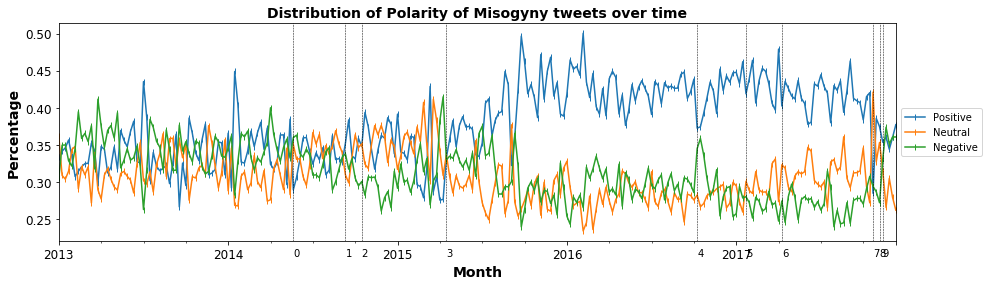

In [309]:
_=plot_type_sentiment('polarity',misoginy_all, 'Misogyny', events=events)

Concerning subjectivity, the percentage of neutral tweets is consistently low, as one would expect. Similarly as in the polarity graph, the percentages of rational and subjective tweets begin by being equal, and in April 2015, there start to be more rational tweets than subjective. That would be caused by an evolution of the discourse from a personal story style (like the one supported my #whyIStayed) to a more fact-based tweet, which is more in lign with activist causes. 

Subjectivity of Misogyny
Percentage of subjective tweets: 50.70364391428114%
    Mean: 0.8181374880142813
    Std: 0.17125787085570274 
Percentage of neutral tweets: 4.814394919633432%
Percentage of rational tweets: 44.48196116608543%
    Mean: 0.11879305411416603
    Std: 0.16526471214679941 
Events 
0 #YesAllWomen is created as a reaction to shootigs by Elliot Rodger
1 First apparition of #WhyIStayed, when Beverly Golden tells her story
2 Beverly Gooden writes a blogpost on NYT 
3 3-year annyversary of Everyday Sexism Project by Laura Bates
4 tape with Donald Trump locker talk emerged. #NotOkay is created
5 Women’s March on Washington, conceived in the aftermath of the presidential election
6 Hillary Clintonstates: misogyny certainly played a role in 2016 election loss
7 Actress Alyssa Milano sparks the #meToo movement 
8 Anthony Rapp accuses Kevin Spacey of sexual harassment
9 LA march protest


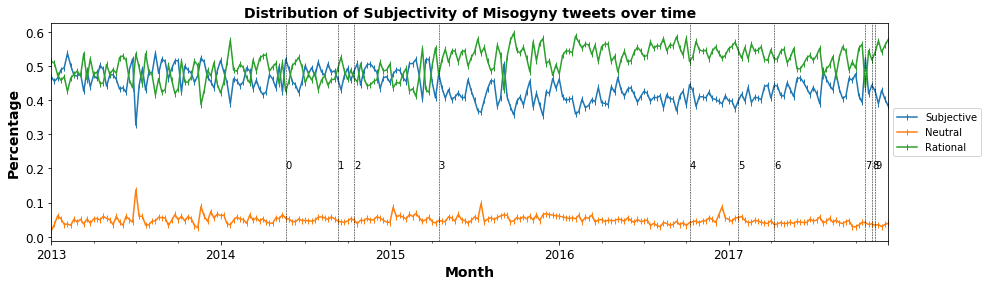

In [310]:
_=plot_type_sentiment('subj', misoginy_all, 'Misogyny', events=events)

In [359]:
plot_type_sentiment_interactive('polarity',misoginy_all, '#Misogyny', events=events)

Polarity of #Misogyny
Percentage of positive tweets: 31.517537698143745%
    Mean: 0.2852382276447624
    Std: 0.21005012333001682 
Percentage of neutral tweets: 31.529449941876464%
Percentage of negative tweets: 36.95301235997979%
    Mean: -0.256218083008347
    Std: 0.1776083514948164 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~isabelaBel/0 or inside your plot.ly account where it is named 'simple-annotation'


In [360]:
plot_type_sentiment_interactive('subj',misoginy_all, '#Misogyny', events=events)

Subjectivity of #Misogyny
Percentage of subjective tweets: 50.70364391428114%
    Mean: 0.8181374880142813
    Std: 0.17125787085570274 
Percentage of neutral tweets: 4.814394919633432%
Percentage of rational tweets: 44.48196116608543%
    Mean: 0.11879305411416603
    Std: 0.16526471214679941 
High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~isabelaBel/0 or inside your plot.ly account where it is named 'simple-annotation'


In [326]:
# alternative function for plotting the 5 traces. 
# not included in the notebook because it is very specific to this data. 
def plot_num_tweets_interactive2(data1, label1, data2=pd.DataFrame(), label2='',
                                 data3=pd.DataFrame(), label3='',
                                 data4=pd.DataFrame(), label4='',
                                 data5=pd.DataFrame(), label5='',
                                 events=pd.DataFrame(), date_to='' , smooth_perform=False ):
    
    '''
    Plot of the number of tweets over time (interactive), grouped by day
    INPUT:
        data1: principal data to plot.
        label1: label of data1
        data2: secondary data (tweets against protest)
        label2: label of data2
        events: dataframe with the events
        date_to: string with format YYYY-MM-DD, ignore data previous to that date
    '''
    if not smooth_perform:
        signal_tranf = lambda x: x
    else:
        signal_tranf = lambda x: smooth(x)
    #Process data 1
    #Ignore dates before date_to
    data1=date_restrictions(data1, date_to)
    #Group it by day and count the number
    data1_grouped=pd.DataFrame(data1.groupby('date').size()).reset_index()
    #Rename columns
    data1_grouped.columns = ['Date', 'TweetsNumber']

    #Trace for principal data
    trace1 = go.Scatter(
        x=data1_grouped['Date'],
        y=signal_tranf(data1_grouped['TweetsNumber']),
        name=label1
    )

    #Add to data list
    data=[trace1]

    #Process data2
    if not data2.empty:
        #Group it by day and count the number
        data2=date_restrictions(data2, date_to)
        #Ignore dates before date_to
        data2_grouped=pd.DataFrame(data2.groupby('date').size()).reset_index()
        data2_grouped.columns = ['Date', 'TweetsNumber']

        #Plot
        trace2 = go.Scatter(
            x=data2_grouped['Date'],
            y=signal_tranf(data2_grouped['TweetsNumber']),
            name=label2
        )

        #Add to data list
        data.append(trace2)
    
        #Process data3
    if not data3.empty:
        #Group it by day and count the number
        data3=date_restrictions(data3, date_to)
        #Ignore dates before date_to
        data3_grouped=pd.DataFrame(data3.groupby('date').size()).reset_index()
        data3_grouped.columns = ['Date', 'TweetsNumber']

        #Plot
        trace3 = go.Scatter(
            x=data3_grouped['Date'],
            y=signal_tranf(data3_grouped['TweetsNumber']),
            name=label3
        )

        #Add to data list
        data.append(trace3)
    
    if not data4.empty:
        #Group it by day and count the number
        data4=date_restrictions(data4, date_to)
        #Ignore dates before date_to
        data4_grouped=pd.DataFrame(data4.groupby('date').size()).reset_index()
        data4_grouped.columns = ['Date', 'TweetsNumber']

        #Plot
        trace4 = go.Scatter(
            x=data4_grouped['Date'],
            y=signal_tranf(data4_grouped['TweetsNumber']),
            name=label4
        )

        #Add to data list
        data.append(trace4)
        
    if not data5.empty:
        #Group it by day and count the number
        data5=date_restrictions(data5, date_to)
        #Ignore dates before date_to
        data5_grouped=pd.DataFrame(data5.groupby('date').size()).reset_index()
        data5_grouped.columns = ['Date', 'TweetsNumber']

        #Plot
        trace5 = go.Scatter(
            x=data5_grouped['Date'],
            y=signal_tranf(data5_grouped['TweetsNumber']),
            name=label5
        )

        #Add to data list
        data.append(trace5)
    
    #Process events
    if not events.empty:
        trace3 = go.Scatter(
            x=list(events['date']),
            y=np.ones(len(events)) * 5,
            mode='markers',
            text=list(events['event']),
            name='events',
            marker = dict(
                size = 10,
                line = dict(
                    width = 2,
                )
            )
        )
        #adding the events
        data.append(trace3)

    #Plots
    layout = go.Layout(
        showlegend=True,
        title = 'Number of tweets per misogyny movement over time'
    )
    fig = go.Figure(data=data, layout= layout)
    plot_url = py.plot(fig, filename='simple-annotation')
    #py.plot(fig, 'TweetNumber=name.html')

